In [7]:
# Latex modules: https://learnsharewithdp.wordpress.com/2020/05/08/latex-matplotlib-google-colab/
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
--2023-11-27 18:36:44--  http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 89.58.7.101
Connecting to mirrors.ctan.org (mirrors.ctan.org)|89.58.7.101|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mirror.koddos.net/CTAN/macros/latex/contrib/type1cm.zip [following]
--2023-11-27 18:36:44--  https://mirror.koddos.net/

### Objective questions for the analysis:
Is the algorithm useful for the focus group?
* Sentiment analysis and how useful was it

The algorithm is solving an issue presented in the group? And which is the issue they are presenting?
* Apply a thematic analysis, based on:
  - Needs
  - How many finished the test
  - Do the sentiments they are presenting, and característics from the app have a correlation with their needs?
  - Are they already using other technologies for solving this need? Or that similar, that will be useful for taking into consideration?

How can the algorithm be improved?

  - Content analysis and errors
reviews and suggestions


### Is algorithm useful based on needs algorithm offer and sentimens

In [21]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df_product_utility = pd.read_excel("/content/drive/MyDrive/Scientific Research August-Dec2023/Data Analysis/Transformed  Data Analysis.xlsx", sheet_name="Product utility")
df_product_utility.head(3)

,Persona,User_id,common_issues_annecdotes,Problemas más comunnes en navegación diaria (1),Anécdotas de accidentes (1),El algoritmo presenta alguna falla técnica durante las encuestas?,"falla_tec_cls (FP = fail pred (1) , FN = not pred (2))",falla_tec_num,"pass_test_num (Sí = 1, No = 0)",Logro pasar la prueba o no,"sentiment_rate (positive = 1, negative=-1)",¿Qué sentimiento tiene al navegar con la aplicación?,qty_extra_obj,Habría algún objeto que no requiere que te avisen?,"msg_effectivity (claro y consiso =2, solo uno = 1, ni uno = 0)",¿El mensaje es claro y consiso?,num_task_untilities (more_than_one = 2 - none= 0),¿Para qué tareas crees que te sería más útil este aparato?,Likeliness = (pass_test + sentiment_rate + qty_extra_obj + msg_effectivity + num_task_utilities)
0,Guille,0,"calle, escalera, alcantarilla abierta, banquet...",En la calle. Escaleras altas. Coladeras abiert...,Caido en coladeras.,NaN,NaN,NaN,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Jose Miguel Maximino Rojas cortez,1,"banqueta, hoyo, persona, poste, desnivel, tran...","obstaculos: cruce de banquetas, agujeros alcan...","hoyos, personas que se caen en alcantarillas",Dijo de mas . No fue exacto. La puerta bien. L...,"FP_det , FP_mid",2.0,1,Sí,1.0,Sintió que le dio mayor seguridad. Facilitar l...,0.0,todo lo mas cercano mejor. Para tener mayor se...,1.0,sí . Mayor volumen nada más,NaN,Para caminar,1
2,Carlos Javier Leal Ramos,2,"objeto superior, cortinas, ramas, anuncios, se...","cosas por arriba, cortinas , ramas de arboles,...",sí. Se cayo un compañero en un registro abierto,se confundia de objetos ( hablaba de un refrig...,FP_det,1.0,1,Sí,0.0,era muy detallado aunque con problemas de pred...,0.0,quiere que le digan mientras más cosas mejor.,1.0,el mensaje es consico pero no claro por las fa...,2.0,"para cualquier cosa pero de noche, porque es d...",3


In [23]:

# rename columns and deleted others, due to preporcess have been made in excel
columns_list = df_product_utility.columns.tolist()
columns_list[2] = 'common_objects'
columns_list[-1] = 'likeability'
df_product_utility = df_product_utility.drop(0)

df_product_utility.columns = columns_list
df_product_utility.drop(columns=columns_list[3:-1], inplace=True)
df_product_utility.drop(columns=columns_list[:2], inplace=True)
df_product_utility['common_objects'] = df_product_utility['common_objects'].apply(lambda x : x.split(',') if type(x) == str else x)
df_product_utility = df_product_utility.explode('common_objects')
df_product_utility['common_objects'] = df_product_utility['common_objects'].str.strip()
df_product_utility['freq_obj'] = 1
#df_product_utility = df_product_utility.groupby(['common_objects']).agg({'likeability': 'mean', 'freq_obj': 'sum'}).reset_index()


# hierarchize class in case of being inside Detectron2 or synonim
df_product_utility['hierarchy_class'] = 0 #missing objects
df_product_utility.loc[df_product_utility['common_objects'].str.contains('anuncios'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('camión'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('coche'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('cortinas'), 'hierarchy_class'] = 'not relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('escalera'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('moto'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('persona'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('señalización'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('sombrilla'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('árbol'), 'hierarchy_class'] = 'very relevant'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('calle'), 'hierarchy_class'] = 'very relevant'

df_product_utility.loc[df_product_utility['common_objects'].str.contains('anuncios'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('camión'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('coche'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('cortinas'), 'hierarchy_class'] = 3
df_product_utility.loc[df_product_utility['common_objects'].str.contains('escalera'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('moto'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('persona'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('señalización'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('sombrilla'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('árbol'), 'hierarchy_class'] = 1
df_product_utility.loc[df_product_utility['common_objects'].str.contains('calle'), 'hierarchy_class'] = 1


# object theme classification
df_product_utility['object_cls'] = 0 #missing objects
df_product_utility.loc[df_product_utility['common_objects'].str.contains('alcantarilla abierta'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('ambulante'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('anuncio'), 'object_cls'] = 'objetos aereos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('banqueta'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('calle'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('camión'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('coche'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('corniza'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('cortinas'), 'object_cls'] = 'interior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('desnivel'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('escalera'), 'object_cls'] = 'interior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('hoyo'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('jabón'), 'object_cls'] = 'interior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('medidores de luz'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('moto'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('objeto superior	'), 'object_cls'] = 'objetos aereos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('pared'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('persona'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('piedra'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('poste'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('ramas'), 'object_cls'] = 'objetos aereos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('rejas'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('ropa'), 'object_cls'] = 'interior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('señalización'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('shampoo'), 'object_cls'] = 'interior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('sombrilla'), 'object_cls'] = 'objetos aereos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('teléfono público'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('toldo'), 'object_cls'] = 'objetos aereos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('transporte público'), 'object_cls'] = 'objetos dinámicos exterior'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('tubos'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('árbol'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('objeto superior'), 'object_cls'] = 'exterior suelo'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('tubos'), 'object_cls'] = 'exterior estructura'
df_product_utility.loc[df_product_utility['common_objects'].str.contains('pierda'), 'object_cls'] = 'exterior suelo'

df_product_utility.drop(columns=columns_list[2], inplace=True)
df_product_utility = df_product_utility.groupby(['object_cls', 'hierarchy_class']).agg({'likeability': 'mean', 'freq_obj': 'sum',}).reset_index()

In [11]:
df_product_utility

,object_cls,hierarchy_class,likeability,freq_obj
0,exterior estructura,0,3.625000,8
1,exterior estructura,1,3.000000,1
2,exterior suelo,0,3.210526,19
3,exterior suelo,1,3.000000,1
4,interior,0,2.000000,3
5,interior,1,4.500000,2
6,interior,3,3.000000,1
7,objetos aereos exterior,0,2.750000,4
8,objetos aereos exterior,1,3.000000,2
9,objetos dinámicos exterior,0,3.000000,4


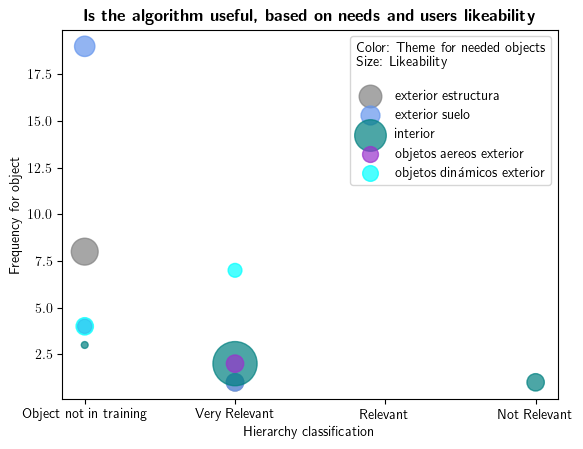

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import matplotlib
# Get a list of all available color names
all_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(all_colors)
color_palette = {l: all_colors[i] for i, l in enumerate(df_product_utility.object_cls)}

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.serif'] = 'Computer Modern Roman'

# Plotting the scatter plot with different colors and sizes
unique_obj_cls = np.unique(df_product_utility.object_cls)
for cat in unique_obj_cls:
    cat_data = (df_product_utility.object_cls == cat)
    plt.scatter(df_product_utility.hierarchy_class[cat_data], df_product_utility.freq_obj[cat_data], s=(df_product_utility.likeability[cat_data])**4.6, c=color_palette[cat], label=cat, alpha=0.7)

plt.xticks([0,1,2,3], ['Object not in training', 'Very Relevant', 'Relevant', 'Not Relevant'])  # Set custom labels for x-axis ticks
plt.xlabel('Hierarchy classification')
plt.ylabel('Frequency for object')
plt.title(r'\textbf{Is the algorithm useful, based on needs and users likeability')
plt.legend(title='Color: Theme for needed objects\nSize: Likeability\n', bbox_to_anchor=(1, 1), )
plt.savefig('UX_evaluation.svg', format='svg', bbox_inches='tight')
plt.savefig('UX_evaluation.jpg', format='jpg', bbox_inches='tight')

plt.show()

### Most important features to improve

In [ ]:
df_improvement_features = pd.read_excel("/content/drive/MyDrive/Scientific Research August-Dec2023/Data Analysis/Transformed  Data Analysis.xlsx", sheet_name="Improvement features")
df_improvement_features.head()

,Persona,User_id,"improve_char (work, navigation, daily use, improvement)",Si hubiera un método de asistencia con tecnología que esperarías que este tuviera? (2) (NAVEGACIÓN),Si hubiera un método de asistencia con tecnología que esperarías que este tuviera? (2) (TRABAJO),¿Consideras que habría alguna característica en particular que te fuera de agrado? (Eg. Poder adaptar la voz) ¿Hay algo en particular que te agrade de la navegación en tu día diario? (3)\n,market_tech,Conoce alguna tecnología para poder asistirle con alguna tarea?,Likeliness = (pass_test + sentiment_rate + qty_extra_obj + msg_effectivity + num_task_utilities)
0,Guille,0,extra objetos exterior,Derecha. Caminaba a la derecha.S,NaN,"Subir banqueta, coladera. Alambrado.Hay un obs...",NaN,NaN,0
1,Jose Miguel Maximino Rojas cortez,1,"medición distancia, ocr, extra objetos alimentos",distancia entre dos pasos y tres pasos,Exactitud de distancia.,Leer menú de restaurantes. Que hay enfrente pa...,voice over,voice over para el celular y siri,1
2,Carlos Javier Leal Ramos,2,"medición distancia, ocr",sensor de proximidad.,transcripción de textos. Que le digan que esta...,Transcripcion de textos,"ocr, object detection",look out de google ( lo conoce pero nunca lo ...,3
3,Javier Aguilar Rosas,3,"medición distancia, detección billetes",Alertarle a 2 o 3 metros. Lo que esta un poco ...,"detección de billetes,",lo fundamental :avisarle de un obstaculo pelig...,voice over,google con voz,2
4,Margarita Vara Pastor,3,"direcciones, ocr, extra objetos exterior",que la dirigieran los lentes,Ayuda en leer textos,"Que le mencione sobre el subir banquetas, que ...",NaN,ninguno,6


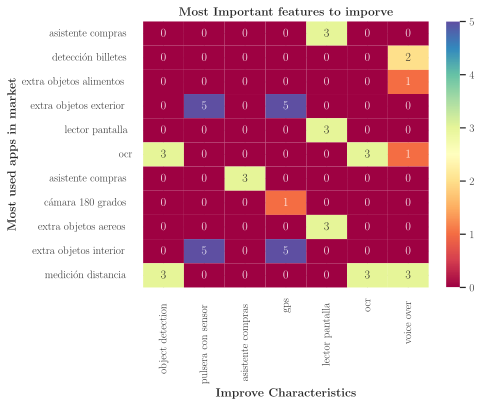

In [ ]:
# rename columns (d# are going to be deleted -> preporcess have been made in excel)
df_improvement_features = df_improvement_features.drop(0)
df_improvement_features.columns = ['d1', 'user_id', 'imporve_char', 'd2', 'd3', 'd4', 'market_tech', 'd5', 'likeability']
df_improvement_features.drop(columns=['d1', 'user_id','d2','d3','d4','d5'], inplace=True)
df_improvement_features['imporve_char'] = df_improvement_features['imporve_char'].apply(lambda x : x.split(',') if type(x) == str else x)
df_improvement_features['market_tech'] = df_improvement_features['market_tech'].apply(lambda x : x.split(',') if type(x) == str else x)

df_improvement_features = df_improvement_features.explode('imporve_char')
df_improvement_features = df_improvement_features.explode('market_tech')
#df_improvement_features['imporve_char'].fillna('No value', inplace=True)
#df_improvement_features['market_tech'].fillna('No value', inplace=True)
x = df_improvement_features.copy()
#df_improvement_features = df_improvement_features.groupby(['imporve_char', 'market_tech']).agg({'likeability': 'sum'}).reset_index()
df_improvement_features = df_improvement_features.pivot_table(index='imporve_char', columns='market_tech', values='likeability', aggfunc='sum', fill_value=0)

import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.serif'] = 'Computer Modern Roman'
import seaborn as sns
# Create heatmap using Seaborn
#plt.figure(figsize=(8, 6))
sns.heatmap(df_improvement_features, annot=True, fmt='d', cmap='Spectral') #GnBu_r
plt.title(r'\textbf{Most Important features to imporve}')
plt.xlabel(r'\textbf{Improve Characteristics}')
plt.ylabel(r'\textbf{Most used apps in market}')

# Save the plot as SVG
plt.savefig('MostImportantFt.svg', format='svg', bbox_inches='tight')
plt.savefig('MostImportantFt.jpg', format='jpg', bbox_inches='tight')

plt.show()

In [ ]:
x
x.pivot_table(index='imporve_char', columns='market_tech', values='likeability', aggfunc='mean', fill_value=0)


market_tech,object detection,pulsera con sensor,asistente compras,gps,lector pantalla,ocr,voice over
imporve_char,,,,,,,
asistente compras,0,0,0,0,3,0,0.0
detección billetes,0,0,0,0,0,0,2.0
extra objetos alimentos,0,0,0,0,0,0,1.0
extra objetos exterior,0,5,0,5,0,0,0.0
lector pantalla,0,0,0,0,3,0,0.0
ocr,3,0,0,0,0,3,1.0
asistente compras,0,0,3,0,0,0,0.0
cámara 180 grados,0,0,0,1,0,0,0.0
extra objetos aereos,0,0,0,0,3,0,0.0


In [ ]:

import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.serif'] = 'Computer Modern Roman'
import seaborn as sns
# Create heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(x, annot=True, fmt='d', cmap='Spectral') #GnBu_r
plt.title(r'\textbf{Most Important features to imporve}')
plt.xlabel(r'\textbf{Improve Characteristics}')
plt.ylabel(r'\textbf{Most used apps in market}')

# Save the plot as SVG
plt.savefig('MostImportantFt.svg', format='svg', bbox_inches='tight')
plt.savefig('MostImportantFt.jpg', format='jpg', bbox_inches='tight')

plt.show()

ValueError: ignored

<Figure size 800x600 with 0 Axes>